In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# col_names = np.array(["c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9", "style"])
# print(len(col_names))


# đọc file dataset
df = pd.read_csv('D:\CODE\Dataset\Indoor Laboratory Fire Dataset\carton_1.csv', encoding="utf-8-sig")
df.head(10)

,Time,Reading ID,Humidity,Temperature,MQ139,TVOC,eCO2,Detector,Status
0,0:00:00,1,43.5,21.3,98,0,400,OFF,0
1,0:00:01,2,43.5,21.3,97,0,400,OFF,0
2,0:00:02,3,43.6,21.4,97,0,400,OFF,0
3,0:00:03,4,43.6,21.4,97,0,400,OFF,0
4,0:00:04,5,43.7,21.4,98,0,400,OFF,0
5,0:00:05,6,43.7,21.4,98,0,400,OFF,0
6,0:00:06,7,43.7,21.4,98,0,400,OFF,0
7,0:00:07,8,43.7,21.4,98,0,400,OFF,0
8,0:00:08,9,43.6,21.4,98,0,400,OFF,0
9,0:00:09,10,43.6,21.4,98,0,400,OFF,0


In [55]:
df.shape

(311, 10)

In [39]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


feature = np.array(["c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"])
# using standard scaler for normalizing: đồng nhất các dữ liệu dạng số
std_scaler = StandardScaler()
def DataNormalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df
# calling the DataNormalization() function
df = DataNormalization(df.copy(), feature)
df.head(5)





,c1,c2,c3,c4,c5,c6,c7,c8,c9,style
0,0.190612,-0.553585,1.532884,-0.866722,-0.511938,-0.989481,1.071014,-1.348957,-0.207784,elegant
1,0.190612,-0.553585,1.532884,-1.733445,-1.090894,-0.989481,2.642172,-1.348957,-0.207784,elegant
2,-1.536000,-0.553585,0.793772,-0.866722,-0.511938,-0.989481,1.071014,-1.348957,-0.207784,elegant
3,-1.536000,-0.553585,1.532884,-1.733445,-0.511938,-0.989481,1.071014,-1.348957,-0.207784,elegant
4,-1.536000,-0.553585,1.532884,1.733445,-0.511938,1.212513,2.642172,-1.348957,-0.207784,elegant


In [83]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import numpy as np
import pandas as pd
col_names = np.array(["c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9", "style"])
# print(col_names)

# đọc file dataset
df = pd.read_csv('D:\CODE\Project_Python\HTThongMinh\Data\dataset_HTTM.csv', encoding="utf-8-sig", names=col_names)

df.head(10) # đọc 10 dòng dữ liệu

# xem  data shape
df.shape

['c1' 'c2' 'c3' 'c4' 'c5' 'c6' 'c7' 'c8' 'c9' 'style']


(311, 10)

In [84]:
std_scaler = StandardScaler()
def DataNormalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df
# calling the DataNormalization() function
df = DataNormalization(df.copy(), feature)
df.head(10)

,c1,c2,c3,c4,c5,c6,c7,c8,c9,style
0,0.190612,-0.553585,1.532884,-0.866722,-0.511938,-0.989481,1.071014,-1.348957,-0.207784,elegant
1,0.190612,-0.553585,1.532884,-1.733445,-1.090894,-0.989481,2.642172,-1.348957,-0.207784,elegant
2,-1.536000,-0.553585,0.793772,-0.866722,-0.511938,-0.989481,1.071014,-1.348957,-0.207784,elegant
3,-1.536000,-0.553585,1.532884,-1.733445,-0.511938,-0.989481,1.071014,-1.348957,-0.207784,elegant
4,-1.536000,-0.553585,1.532884,1.733445,-0.511938,1.212513,2.642172,-1.348957,-0.207784,elegant
5,0.190612,-0.553585,0.054661,-0.866722,-0.511938,-0.989481,-0.500144,1.460366,-0.207784,elegant
6,0.190612,-0.553585,-0.684451,-0.866722,-0.511938,-0.989481,1.856593,0.523925,-0.207784,elegant
7,0.190612,-0.553585,-2.162674,-0.866722,-0.511938,-0.989481,-0.500144,-0.412516,-0.207784,elegant
8,0.190612,-0.553585,0.793772,-0.866722,-0.511938,-0.989481,1.856593,1.460366,-0.207784,elegant
9,0.190612,-0.553585,-2.162674,-0.866722,-1.090894,-0.989481,-1.285723,-0.412516,-0.207784,elegant


In [85]:
df.describe()

,c1,c2,c3,c4,c5,c6,c7,c8,c9
count,3.110000e+02,3.110000e+02,3.110000e+02,3.110000e+02,3.110000e+02,3.110000e+02,3.110000e+02,3.110000e+02,3.110000e+02
mean,-1.330126e-15,1.601077e-16,1.481487e-15,2.227586e-16,-2.770203e-16,1.433651e-15,5.137013e-16,1.620711e-16,-6.925507e-16
std,1.001612e+00,1.001612e+00,1.001612e+00,1.001612e+00,1.001612e+00,1.001612e+00,1.001612e+00,1.001612e+00,1.001612e+00
min,-2.111537e+00,-1.994296e+00,-2.162674e+00,-2.600167e+00,-1.669850e+00,-1.539980e+00,-1.285723e+00,-3.221839e+00,-1.554054e+00
25%,-9.604625e-01,-5.535849e-01,-6.844505e-01,-8.667224e-01,-1.090894e+00,-9.894813e-01,-1.285723e+00,-4.125159e-01,-8.809194e-01
50%,7.661492e-01,1.667704e-01,5.466098e-02,0.000000e+00,-5.119383e-01,-4.389827e-01,2.854355e-01,5.239253e-01,-2.077844e-01
75%,7.661492e-01,1.667704e-01,7.937725e-01,8.667224e-01,1.224929e+00,1.212513e+00,2.854355e-01,5.239253e-01,4.653505e-01
max,7.661492e-01,1.607481e+00,1.532884e+00,1.733445e+00,1.224929e+00,1.212513e+00,2.642172e+00,1.460366e+00,1.811620e+00


In [86]:
df['style'].value_counts()

minimalist    140
active         87
elegant        84
Name: style, dtype: int64

In [87]:
# # standardize
# standardize_data = df

# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
standardize_data = df.copy()
standardize_style = pd.DataFrame(standardize_data['style'])

# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
lb_enc = preprocessing.LabelEncoder()
enc_label = standardize_style.apply(lb_enc.fit_transform)
standardize_data['predict'] = enc_label

# np.save("D:\\CODE\\Project_Python\\HTThongMinh\\Data\\models\\style_classes.npy",style_classes,allow_pickle=True)


# one-hot-encoding attack label
standardize_data = pd.get_dummies(standardize_data,columns=['style'],prefix="",prefix_sep="") 
standardize_data['style'] = standardize_style
standardize_data

,c1,c2,c3,c4,c5,c6,c7,c8,c9,predict,active,elegant,minimalist,style
0,0.190612,-0.553585,1.532884,-0.866722,-0.511938,-0.989481,1.071014,-1.348957,-0.207784,1,0,1,0,elegant
1,0.190612,-0.553585,1.532884,-1.733445,-1.090894,-0.989481,2.642172,-1.348957,-0.207784,1,0,1,0,elegant
2,-1.536000,-0.553585,0.793772,-0.866722,-0.511938,-0.989481,1.071014,-1.348957,-0.207784,1,0,1,0,elegant
3,-1.536000,-0.553585,1.532884,-1.733445,-0.511938,-0.989481,1.071014,-1.348957,-0.207784,1,0,1,0,elegant
4,-1.536000,-0.553585,1.532884,1.733445,-0.511938,1.212513,2.642172,-1.348957,-0.207784,1,0,1,0,elegant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0.766149,0.166770,0.793772,0.866722,1.224929,1.212513,0.285435,-3.221839,-1.554054,2,0,0,1,minimalist
307,0.766149,0.166770,0.793772,0.866722,1.224929,1.212513,0.285435,-2.285398,-0.207784,2,0,0,1,minimalist
308,0.766149,0.166770,0.793772,0.866722,1.224929,1.212513,0.285435,-1.348957,0.465351,2,0,0,1,minimalist
309,0.766149,0.166770,0.793772,0.866722,1.224929,1.212513,0.285435,-0.412516,1.138485,2,0,0,1,minimalist


In [88]:
# saving final dataset to disk
standardize_data.to_csv('D:\\CODE\\Project_Python\\HTThongMinh\\Data\\standardize_data.csv')

# final dataset for multi-class classification
standardize_data

,c1,c2,c3,c4,c5,c6,c7,c8,c9,predict,active,elegant,minimalist,style
0,0.190612,-0.553585,1.532884,-0.866722,-0.511938,-0.989481,1.071014,-1.348957,-0.207784,1,0,1,0,elegant
1,0.190612,-0.553585,1.532884,-1.733445,-1.090894,-0.989481,2.642172,-1.348957,-0.207784,1,0,1,0,elegant
2,-1.536000,-0.553585,0.793772,-0.866722,-0.511938,-0.989481,1.071014,-1.348957,-0.207784,1,0,1,0,elegant
3,-1.536000,-0.553585,1.532884,-1.733445,-0.511938,-0.989481,1.071014,-1.348957,-0.207784,1,0,1,0,elegant
4,-1.536000,-0.553585,1.532884,1.733445,-0.511938,1.212513,2.642172,-1.348957,-0.207784,1,0,1,0,elegant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0.766149,0.166770,0.793772,0.866722,1.224929,1.212513,0.285435,-3.221839,-1.554054,2,0,0,1,minimalist
307,0.766149,0.166770,0.793772,0.866722,1.224929,1.212513,0.285435,-2.285398,-0.207784,2,0,0,1,minimalist
308,0.766149,0.166770,0.793772,0.866722,1.224929,1.212513,0.285435,-1.348957,0.465351,2,0,0,1,minimalist
309,0.766149,0.166770,0.793772,0.866722,1.224929,1.212513,0.285435,-0.412516,1.138485,2,0,0,1,minimalist


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv("D:\\CODE\\Project_Python\\HTThongMinh\\Data\\dataset_2.csv")
# lấy tất cả các cột trừ cột cuối cùng, và lấy ở dạng num
x = df.iloc[:,:-1].values
print(x)
# lấy tất cả các hàng trừ cột cuối cùng, và lấy ở dạng num
y = df.iloc[:,-1].values
print(y)

[[5 3 6 ... 4 3 3]
 [5 3 6 ... 6 3 3]
 [2 3 5 ... 4 3 3]
 ...
 [6 4 5 ... 3 3 4]
 [6 4 5 ... 3 4 5]
 [6 4 5 ... 3 6 6]]
['elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant'
 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant'
 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant'
 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant'
 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant'
 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant'
 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant'
 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant'
 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant'
 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant'
 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant'
 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant' 'elegant'
 'active' 'active' 'active' 

In [2]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [3]:
# train model SVM
from sklearn.svm import SVC
lsvm=SVC(kernel='poly', gamma='auto')
lsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='poly')

In [4]:
# saving trained model to disk
import pickle # saving and loading trained model
from os import path

pkl_filename = "D:\\CODE\\Project_Python\\HTThongMinh\\Data\\models\\lsvm_multi.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lsvm = pickle.load(file)
  print("Loade model from disk")

Saved model to disk
Loade model from disk


In [5]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

y_pred=lsvm.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("LSVM-Classifier Multi-class Set-Accuracy is ", ac)

LSVM-Classifier Multi-class Set-Accuracy is  96.82539682539682


In [77]:
# print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
# print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
# print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
# print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [94]:
c1 = 2
c2 = 3
c3 = 6
c4 = 3
c5 = 2
c6 = 2
c7 = 3
c8 = 4
c9 = 3
df_test = pd.DataFrame({"c1": [int(c1)], "c2": [int(c2)], "c3": [int(c3)], "c4": [int(c4)], "c5": [int(c5)],
                        "c6": [int(c6)], "c7": [int(c7)], "c8": [int(c8)], "c9": [int(c9)]})

y_pred=lsvm.predict(df_test) # predicting target attribute on testing dataset
print(y_pred[0])
# ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
# print("LSVM-Classifier Multi-class Set-Accuracy is ", ac)

minimalist


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [1]:
import numpy as np
import pandas as pd

col_names = np.array(["c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9", "style"])
print(len(col_names))


# đọc file dataset
df = pd.read_csv('D:\CODE\Project_Python\HTThongMinh\Data\dataset_HTTM.csv', encoding="utf-8-sig", names=col_names)
df.head(10)

10


,c1,c2,c3,c4,c5,c6,c7,c8,c9,style
0,5,3,6,3,3,2,4,3,3,elegant
1,5,3,6,2,2,2,6,3,3,elegant
2,2,3,5,3,3,2,4,3,3,elegant
3,2,3,6,2,3,2,4,3,3,elegant
4,2,3,6,6,3,6,6,3,3,elegant
5,5,3,4,3,3,2,2,6,3,elegant
6,5,3,3,3,3,2,5,5,3,elegant
7,5,3,1,3,3,2,2,4,3,elegant
8,5,3,5,3,3,2,5,6,3,elegant
9,5,3,1,3,2,2,1,4,3,elegant


In [2]:
df.describe()

,c1,c2,c3,c4,c5,c6,c7,c8,c9
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,4.668810,3.768489,3.926045,4.000000,3.884244,3.797428,2.636656,4.440514,3.308682
std,1.740307,1.390441,1.355156,1.155631,1.730032,1.819463,1.274998,1.069594,1.487980
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,4.000000,2.000000
50%,6.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,5.000000,3.000000
75%,6.000000,4.000000,5.000000,5.000000,6.000000,6.000000,3.000000,5.000000,4.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [15]:
# Ví dụ về scale sử dụng MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# tạo bộ scaler
scaler = MinMaxScaler()
normalized = scaler.fit_transform(df.iloc[:,:-1].values)
# quay lại miền giá trị cũ
# inverse = scaler.inverse_transform(normalized)

In [16]:
df_scale = pd.DataFrame(normalized)

In [17]:
df_scale.head(10)

,0,1,2,3,4,5,6,7,8
0,0.8,0.4,1.0,0.4,0.4,0.2,0.6,0.4,0.4
1,0.8,0.4,1.0,0.2,0.2,0.2,1.0,0.4,0.4
2,0.2,0.4,0.8,0.4,0.4,0.2,0.6,0.4,0.4
3,0.2,0.4,1.0,0.2,0.4,0.2,0.6,0.4,0.4
4,0.2,0.4,1.0,1.0,0.4,1.0,1.0,0.4,0.4
5,0.8,0.4,0.6,0.4,0.4,0.2,0.2,1.0,0.4
6,0.8,0.4,0.4,0.4,0.4,0.2,0.8,0.8,0.4
7,0.8,0.4,0.0,0.4,0.4,0.2,0.2,0.6,0.4
8,0.8,0.4,0.8,0.4,0.4,0.2,0.8,1.0,0.4
9,0.8,0.4,0.0,0.4,0.2,0.2,0.0,0.6,0.4


In [18]:
df_scale.describe()

,0,1,2,3,4,5,6,7,8
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,0.733762,0.553698,0.585209,0.600000,0.576849,0.559486,0.327331,0.688103,0.461736
std,0.348061,0.278088,0.271031,0.231126,0.346006,0.363893,0.255000,0.213919,0.297596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.400000,0.400000,0.400000,0.200000,0.200000,0.000000,0.600000,0.200000
50%,1.000000,0.600000,0.600000,0.600000,0.400000,0.400000,0.400000,0.800000,0.400000
75%,1.000000,0.600000,0.800000,0.800000,1.000000,1.000000,0.400000,0.800000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


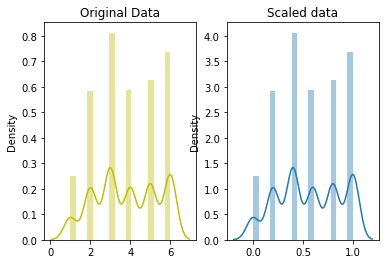

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df.iloc[:,:-1], ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(df_scale, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()